In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import math

pd.options.mode.chained_assignment = None

In [31]:
data = pd.read_csv("data.csv")

In [32]:
#data['outHumidex'] = data['outTemperature']+0.555*(6.112*10**(7.5*data['outTemperature']/(237.7+data['outTemperature']))*data['outHumidity']/100-10)
#data['roomHumidex'] = data['roomTemperature']+0.555*(6.112*10**(7.5*data['roomTemperature']/(237.7+data['roomTemperature']))*data['roomHumidity']/100-10)
#data['conditionerState'] = [0 if i%2==0 else 1 for i in range(len(data))]
#data['colorLine'] = [(0.2, 0.2, 0.2) if row==0 else (0.2, 0.2, 0.2) for row in data['conditionerState']]

data = data[data['day'] == '27/07/2020']
data.sort_values("roomHumidex").head()

,day,hour,roomTemperature,roomHumidity,roomHumidex,roomHeatIndex,outTemperature,outHumidity,outHumidex,outHeatIndex,personCount,humidexTarget,conditionerState
26,27/07/2020,18:06,25.5,38.6,26.96,25.11,30.90,48.0,37.36,32.08,1.0,28.25,0.0
27,27/07/2020,18:08,25.5,38.6,26.96,25.11,31.03,52.0,37.36,33.07,1.0,28.25,0.0
10,27/07/2020,17:34,25.5,38.6,26.96,25.11,31.33,48.0,37.16,32.76,1.0,28.25,1.0
25,27/07/2020,18:04,25.6,38.8,27.14,25.23,30.90,48.0,37.36,32.08,1.0,28.25,1.0
11,27/07/2020,17:36,25.6,39.1,27.19,25.24,31.33,48.0,38.09,32.76,1.0,28.25,0.0


(array([ 0., 23.]), <a list of 2 Text xticklabel objects>)

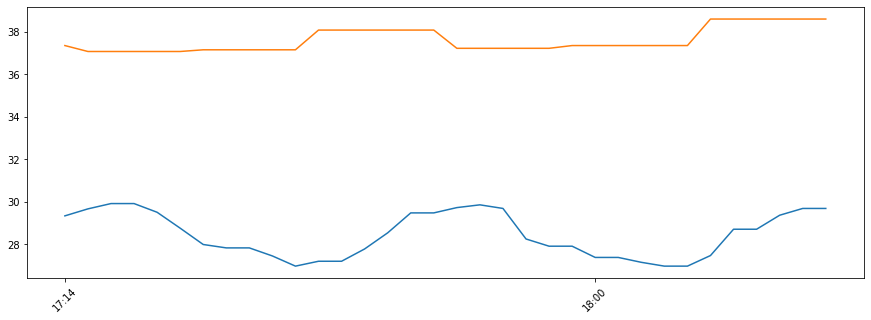

In [33]:
def generate_xticks(hours):
    x_ticks = []
    visited = set()
    for hour in hours:
        h = hour.split(":")[0]
        if h not in visited:
            x_ticks.append(hour)
        visited.add(h)
    return x_ticks


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 5)
ax.plot(data['hour'], data['roomHumidex'])
ax.plot(data['hour'], data['outHumidex'])

xticks = generate_xticks(data['hour'])
ax.set_xticks(xticks)
plt.xticks(rotation=45)




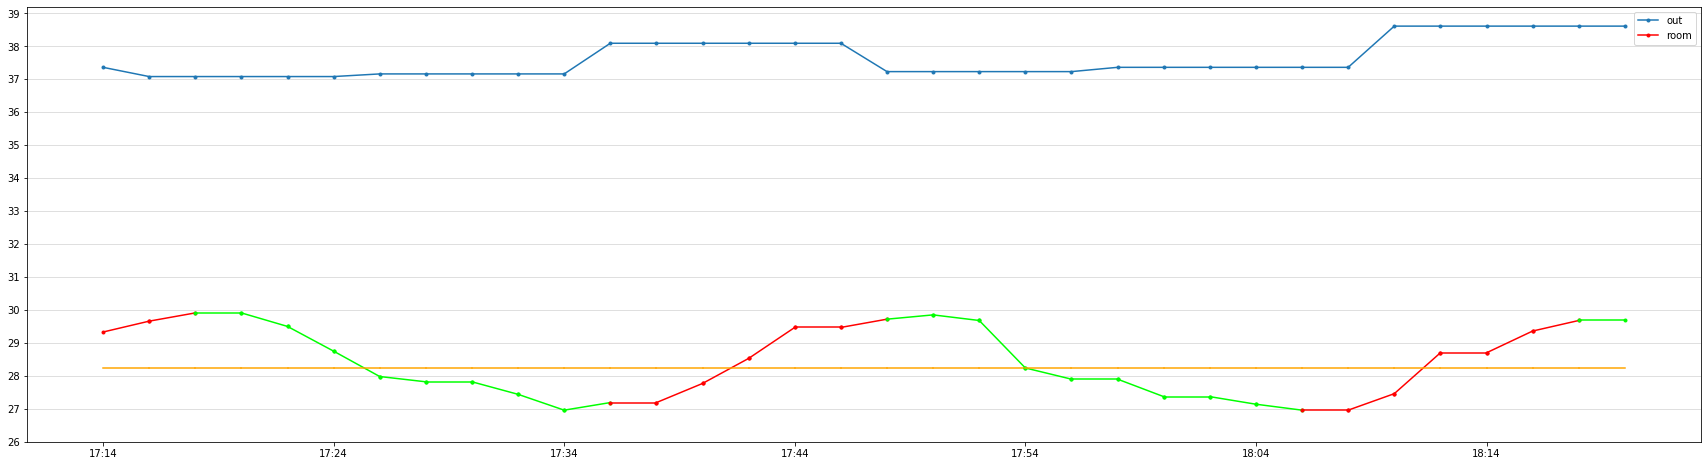

In [42]:
def drawLinePlot(data):
    plt.figure(figsize=(30,8))
    ax = plt.gca()
    legend = []
    marker_sizes = np.linspace(30, 20, len(data))
    xticks = generate_xticks(data['hour'])

    #legend.append(legend_function(key))
    ax.plot(data['hour'], data['outHumidex'], '.-')
    #ax.plot(data['hour'], data['roomHumidex'], '.-')
    
    x, y = data['hour'], data['roomHumidex']
    for x1, x2, y1, y2, conditionerState, humidexTarget in zip(x, x[1:], y, y[1:], data['conditionerState'], data['humidexTarget']):
        if conditionerState == 0:
            ax.plot([x1, x2], [y1, y2], '.-', c='red')
        else:
            ax.plot([x1, x2], [y1, y2], '.-', c='lime')
        plt.plot([x1, x2], [humidexTarget, humidexTarget], c='orange')
        
    #ax.plot(data['hour'], data['roomHumidex'], '.-', colors=data['colorLine'])
    #for i in range(len(data)):
     #   row = data.loc[i]
      #  ax.plot(row['hour'], row['roomHumidex'], '.-', c=(0.2,0.3,0.4))
        #sns.lineplot(x=range(0,len(quantiles)), y='front_abs_dist', ax=ax, data=quantiles)
    plt.xticks([data['hour'][i] for i in np.arange(0, len(data['hour']), 5)])
    plt.yticks([i for i in range(26, 40)])
    ax.grid(alpha=0.5, axis = 'y')

    ax.grid(False, axis = 'x')
    y_min, y_max = ax.get_ylim()

    
    color_shade = {0: '#ffffffff', 1:'#efefefff'}
    
    humidexTarget
    plt.ylim(26,y_max)
    ax.legend(['out', 'room'])
    
    #_= ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.hlines(0, 0, 16)
    plt.show()
    
drawLinePlot(data)

In [46]:
data = pd.read_csv("data_off.csv")
data['outHumidex'] = data['outTemperature']+0.555*(6.112*10**(7.5*data['outTemperature']/(237.7+data['outTemperature']))*data['outHumidity']/100-10)
data['roomHumidex'] = data['roomTemperature']+0.555*(6.112*10**(7.5*data['roomTemperature']/(237.7+data['roomTemperature']))*data['roomHumidity']/100-10)

data.head()

,day,hour,roomTemperature,roomHumidity,roomHeatIndex,outTemperature,outHumidity,outHeatIndex,outHumidex,roomHumidex
0,10/07/2020,20:28,30.5,44.4,30.90,30.25,45.0,30.65,35.424951,35.684148
1,10/07/2020,20:37,30.5,44.4,30.90,29.90,51.0,31.06,36.263819,35.684148
2,10/07/2020,20:38,30.4,44.7,30.81,29.90,51.0,31.06,36.263819,35.595158
3,10/07/2020,20:45,31.3,43.0,31.79,29.89,51.0,31.04,36.246991,36.629811
4,10/07/2020,20:50,30.9,44.7,31.50,29.89,51.0,31.04,36.246991,36.405821


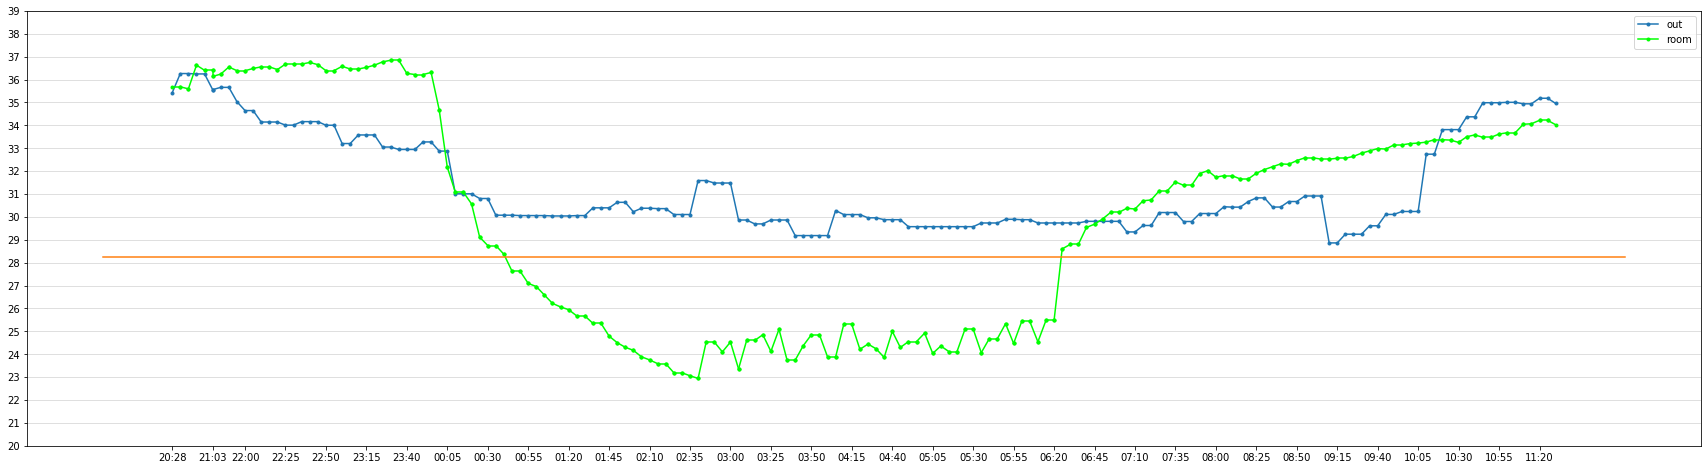

In [49]:
def drawLinePlot(data):
    plt.figure(figsize=(30,8))
    ax = plt.gca()
    legend = []
    marker_sizes = np.linspace(30, 20, len(data))
    xticks = generate_xticks(data['hour'])

    #legend.append(legend_function(key))
    ax.plot(data['hour'], data['outHumidex'], '.-')
    #ax.plot(data['hour'], data['roomHumidex'], '.-')
    
    x, y = data['hour'], data['roomHumidex']
    for x1, x2, y1, y2 in zip(x, x[1:], y, y[1:]):
        ax.plot([x1, x2], [y1, y2], '.-', c='lime')
    

    plt.xticks([data['hour'][i] for i in np.arange(0, len(data['hour']), 5)])
    plt.yticks([i for i in range(15, 40)])
    ax.grid(alpha=0.5, axis = 'y')

    ax.grid(False, axis = 'x')
    y_min, y_max = ax.get_ylim()

    
    color_shade = {15: '#ffffffff', 1:'#efefefff'}
    
    plt.ylim(20,y_max)
    ax.legend(['out', 'room'])
    
    plt.plot(ax.get_xlim(), [28.25, 28.25])

    #_= ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.hlines(0, 0, 16)
    plt.show()
    
drawLinePlot(data)